In [12]:
from simuPark.park import DisneyPark
from matplotlib.pyplot import plot, hist, gcf, figure, xlabel, ylabel
import numpy as np
from scipy.special import gamma, factorial
import pandas as pd
import scipy.stats as st

x = np.linspace(0, 16, 16*60)
k = 5
fn = lambda x, k:  (((0.631012633902875 * ((x+1) ** 0 ) + 0.141641794969108 * ((x+1) ** 1 ) + 1.08320562754808 * ((x+1) ** 2 ) + -0.386896805430061 * ((x+1) ** 3 ) + 0.0645561077512354 * ((x+1) ** 4 ) + -0.00580069833046977 * ((x+1) ** 5 ) + 0.000263776181717327 * ((x+1) ** 6 ) + -4.72376212119374e-06 * ((x+1) ** 7 ))) / 10)

park = DisneyPark(
    fn = fn,
    fastpass_pool_size=0.3,

)
park.start_day(max_entry_rate=95000/960, wait_time_update=5)

Generating Entry Events...
Entry Events Generated



100%|██████████| 960/960 [00:19<00:00, 48.87it/s] 


38984
['Walk15', 'Walk10', 'ShopGifts', 'EatRestaurant', 'BathroomBreak', 'TakePictures']
['DINOSAUR', 'Expedition Everest', 'Flight of Passage', 'Kali River Rapids', 'Kilimanjaro Safaris', "Na'vi River Journey", 'TriceraTop Spin']
['Tourist', 'Average', 'Activity Enjoyer', 'Attraction Enjoyer', 'All Day Park', 'Relaxed Visitor']


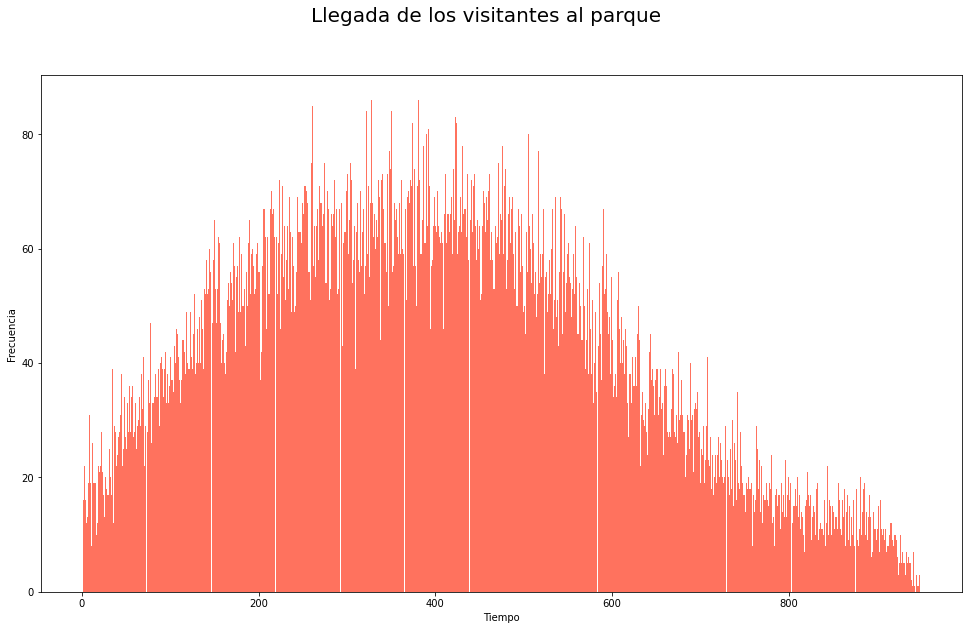

In [13]:
from matplotlib.pyplot import plot, hist, gcf, figure, xlabel, ylabel
import numpy as np
from scipy.special import gamma, factorial
import pandas as pd

print(len(park.guests))

y = [guest.arrival_time for guest in park.guests]

fig = figure()
fig.set_size_inches(16.5, 9.5)
hist(y, color="#ff725e", bins=960);
fig.suptitle('Llegada de los visitantes al parque', fontsize = 20)
xlabel('Tiempo')
ylabel('Frecuencia')


print([i.name for i in park.activities])
print([i.name for i in park.attractions])
print([i.name for i in park.guest_archetypes])

In [14]:
guest_data = []
column_name = [
    'Archetype',
    'arrival_time',
    'departure_time',
    'time_in_park',
    'max_wait',
    'attractions_experienced',
    'fastpass_used',
    'total_wait_time',
    'average_wait_time',
    ]

for guest in park.guests:
    current_guest = []

    current_guest.append(guest.archetype)
    current_guest.append(guest.arrival_time)
    current_guest.append(guest.departure_time)
    current_guest.append(guest.departure_time - guest.arrival_time)
    current_guest.append(guest.max_wait)
    current_guest.append(guest.attractions_experienced)
    current_guest.append(guest.fastpass_used)
    current_guest.append(guest.total_wait_time)
    if guest.attractions_experienced == 0:
        current_guest.append(0)
    else: 
        current_guest.append(guest.total_wait_time / guest.attractions_experienced)

    guest_data.append(current_guest)

guest_df = pd.DataFrame(guest_data, columns=column_name)
# guest_df.to_csv(r'./datasets/DFP.csv')
guest_df

,Archetype,arrival_time,departure_time,time_in_park,max_wait,attractions_experienced,fastpass_used,total_wait_time,average_wait_time
0,Attraction Enjoyer,1,260,259,70,9,0,49,5.444444
1,Attraction Enjoyer,1,258,257,70,8,0,113,14.125000
2,Relaxed Visitor,1,244,243,25,5,0,32,6.400000
3,All Day Park,1,514,513,40,15,1,212,14.133333
4,Activity Enjoyer,1,217,216,10,2,0,24,12.000000
...,...,...,...,...,...,...,...,...,...
38979,Relaxed Visitor,946,960,14,25,0,0,13,0.000000
38980,All Day Park,947,960,13,40,0,0,0,0.000000
38981,Relaxed Visitor,948,960,12,25,0,0,0,0.000000
38982,Activity Enjoyer,948,960,12,10,0,0,0,0.000000


Atracciones experimentadas promedio: 3.581212805253437
Atracciones experimentadas desviación estandar: 2.825300516925964


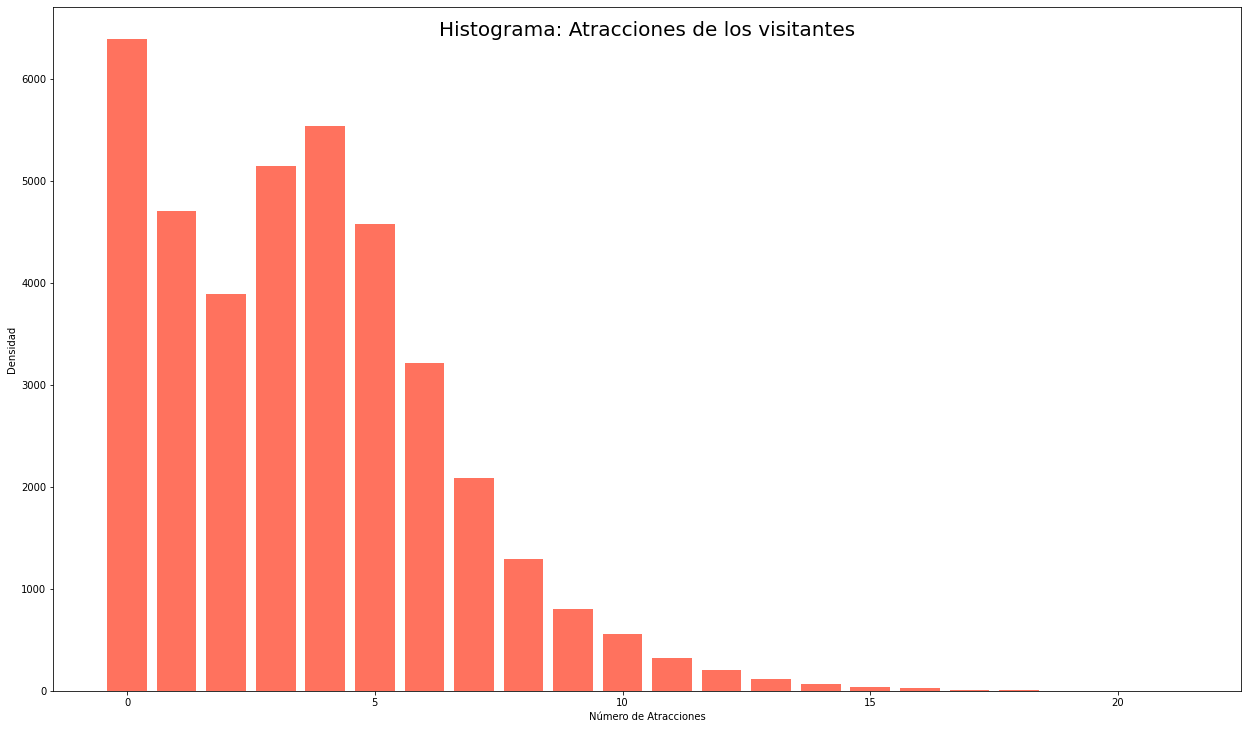

In [15]:
heights = [0 for _ in range(np.max(guest_df['attractions_experienced'])+1)]
labels = [i for i in range(np.max(guest_df['attractions_experienced'])+1)]
attrExp = [guest.attractions_experienced for guest in park.guests]

for guest in park.guests:
    heights[guest.attractions_experienced] += 1

fig = figure()
fig.set_size_inches(16.5, 9.5)
ax = fig.add_axes([0,0,1,1])
ax.bar(labels, heights, color="#ff725e");
fig.suptitle('tracciones de los visitantes', fontsize = 20)
xlabel('Número de Atracciones')
ylabel('Densidad')

print(f'Atracciones experimentadas promedio: {np.mean(attrExp)}')
print(f'Atracciones experimentadas desviación estandar: {np.std(attrExp)}')

37.29686342484712
(37.06305361811155, 37.53067323158268)
32595
125.0


Text(0, 0.5, 'Densidad')

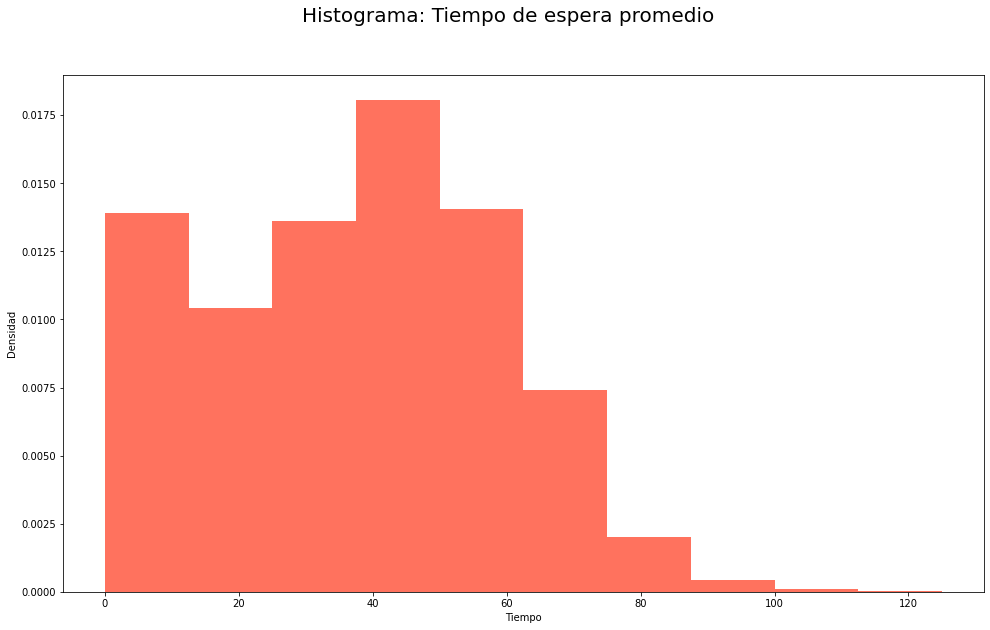

In [16]:
avgWaitTime = []

for guest in park.guests:
    if guest.attractions_experienced == 0:
        continue

    avgWaitTime.append(guest.total_wait_time / guest.attractions_experienced)


print(np.mean(avgWaitTime))
print(st.t.interval(alpha=0.95, df=len(avgWaitTime)-1, loc=np.mean(avgWaitTime), scale=st.sem(avgWaitTime)))
print(len(avgWaitTime))
print(max(avgWaitTime))

fig = figure()
fig.set_size_inches(16.5, 9.5)
hist(avgWaitTime, density=True, color="#ff725e");
fig.suptitle('Histograma: Tiempo de espera promedio', fontsize = 20)
xlabel('Tiempo')
ylabel('Densidad')

In [17]:
attr_wait_time = [[attr.name, attr.queue.top_wait_time] for attr in park.attractions]
attr_df = pd.DataFrame(attr_wait_time, columns=["Name", "MaximunWaitTime"])
attr_df

,Name,MaximunWaitTime
0,DINOSAUR,30
1,Expedition Everest,20
2,Flight of Passage,50
3,Kali River Rapids,15
4,Kilimanjaro Safaris,30
5,Na'vi River Journey,40
6,TriceraTop Spin,0


In [18]:
attr_alt_wait_time = [[attr.name, attr.alt_queue.top_wait_time] for attr in park.attractions]
attr_df_alt = pd.DataFrame(attr_alt_wait_time, columns=["Name", "MaximunWaitTime"])
attr_df_alt

,Name,MaximunWaitTime
0,DINOSAUR,0
1,Expedition Everest,0
2,Flight of Passage,0
3,Kali River Rapids,0
4,Kilimanjaro Safaris,0
5,Na'vi River Journey,0
6,TriceraTop Spin,0


In [19]:
[guest for guest in park.guests if guest.attractions_experienced != 0 and guest.attractions_experienced == max(labels)][0].report()



id: 911  arvTime: 45 things_done: ['Expedition Everest', 'Flight of Passage', 'DINOSAUR', 'DINOSAUR', 'TriceraTop Spin', "Na'vi River Journey", 'Flight of Passage', 'Flight of Passage', 'Flight of Passage', 'Expedition Everest', 'Flight of Passage', 'Kilimanjaro Safaris', 'DINOSAUR', 'Kilimanjaro Safaris', 'DINOSAUR', 'DINOSAUR', 'Kilimanjaro Safaris', 'Flight of Passage', 'Flight of Passage', 'Expedition Everest', 'Flight of Passage'] attrExp: 21
queues_joined: 21 total_wait_time: 172 archetype: Attraction Enjoyer


In [20]:
[guest for guest in park.guests if guest.attractions_experienced != 0 and guest.total_wait_time / guest.attractions_experienced == max(avgWaitTime)][0].report()

park.attractions[0].queue.max_in_queue


id: 33593  arvTime: 646 things_done: ["Na'vi River Journey"] attrExp: 1
queues_joined: 2 total_wait_time: 125 archetype: Attraction Enjoyer


1477

In [21]:
len([guest for guest in park.guests if guest.attractions_experienced == 0])

6389